<a href="https://colab.research.google.com/github/JRcepeda/Proyectos/blob/main/retornos_y_volatildiad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance

In [ ]:
import yfinance as yf
import scipy.stats as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data

In [ ]:
datos=yf.Ticker('^GSPC').history(start='2015-01-01',end='2021-01-01')

In [ ]:
datos.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-01-02 00:00:00-05:00,2058.899902,2072.360107,2046.040039,2058.199951,2708700000,0.0,0.0
2015-01-05 00:00:00-05:00,2054.439941,2054.439941,2017.339966,2020.579956,3799120000,0.0,0.0
2015-01-06 00:00:00-05:00,2022.150024,2030.250000,1992.439941,2002.609985,4460110000,0.0,0.0
2015-01-07 00:00:00-05:00,2005.550049,2029.609985,2005.550049,2025.900024,3805480000,0.0,0.0
2015-01-08 00:00:00-05:00,2030.609985,2064.080078,2030.609985,2062.139893,3934010000,0.0,0.0


In [ ]:
datos['Rendimientos Simple']=(datos['Close']/datos['Close'].shift(1))-1

In [ ]:
datos['Rendimientos log']=np.log(datos['Close']/datos['Close'].shift(1))

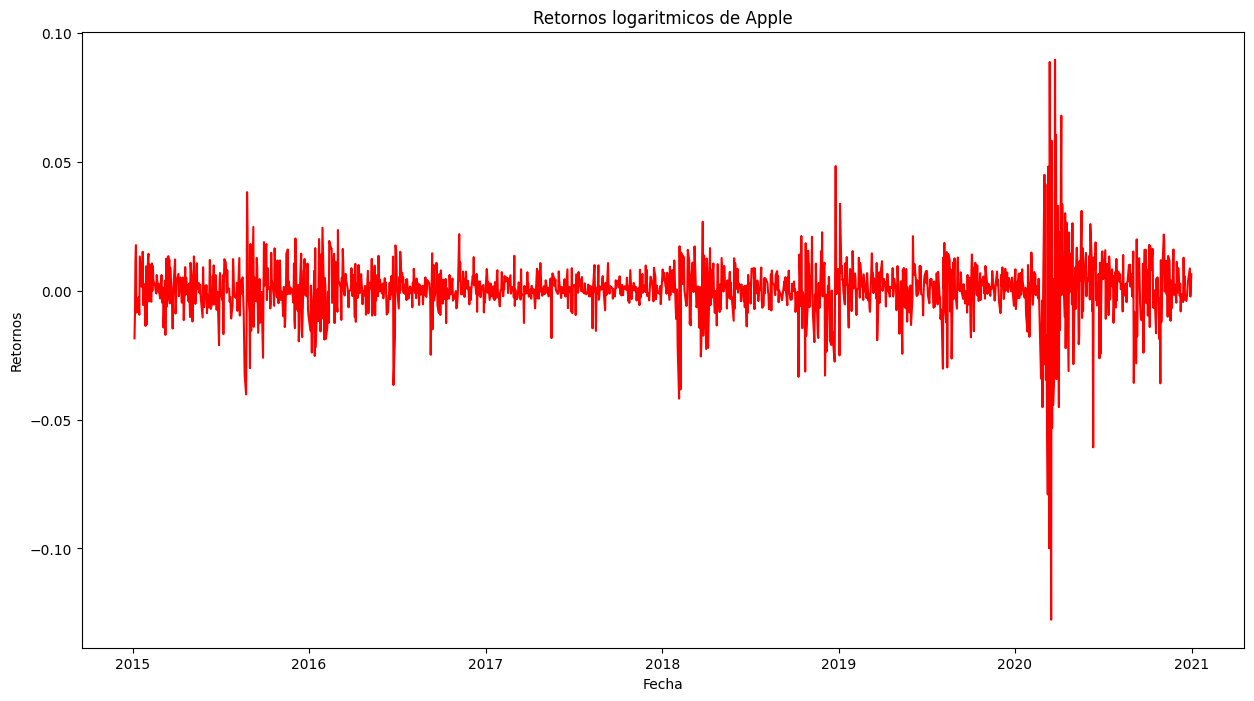

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(datos['Rendimientos log'],c='Red')
plt.title('Retornos logaritmicos de Apple')
plt.xlabel('Fecha')
plt.ylabel('Retornos')
plt.show()

In [ ]:
#volatilidad del activo como la desviación estándar de los retonrnos
#Debido a que los retorno son diarios la volatilidad será diaria
vol_d=datos['Rendimientos log'].std()
vol_d

0.011815364418657884

In [ ]:
# Para caclular la volatilidad anual vamos a tener en cuenta que un año tiene 252 dias bursatiles
vol_d=datos['Rendimientos log'].std()
vol_anual=vol_d*np.sqrt(252)
vol_anual #la volatilidad anual con retornos log es aproximadamente del 18.66%

0.18756309540822008

In [ ]:
#volatilidad anual con retornos aritméticos
vol_d=datos['Rendimientos Simple'].std()
vol_anual=vol_d*np.sqrt(252)
vol_anual

0.1866462404251635

tenemos que la varianza anualizada es  sigmacuadrado=sumatoria de varianza dia hasta 252

Lo anterior es igual a 252 por la varianza diaria

por lo que sacando raiz a ambos lados de la ecuación la desviación estadandar anual es igual a sigma=raiz(252*vardiaria), sacando raiz se tiene que la desviación estandar anual es sigma=desviación_diaria*raiz(252)

In [ ]:
#retorno log promedio anualizado
mean_d=datos['Rendimientos log'].mean()
mean_a=mean_d*252
mean_a

0.10038969485559719

In [ ]:
#retorno aritmetico promedio anualizado
mean_d=datos['Rendimientos Simple'].mean()
mean_a=mean_d*252
mean_a

0.11792710181217793